In [1]:
!pip install -q Pillow numpy matplotlib scipy scikit-image opencv-python

In [1]:
import sys
import os
import itertools
import random

import PIL
import numpy as np
from numpy.linalg import norm
from math import *
from scipy import ndimage
from scipy import misc

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

import cv2

In [2]:
def setAxisColor(axisColor):
    ax = plt.gca()
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color(axisColor)
    ax.yaxis.label.set_color(axisColor)
    ax.xaxis.label.set_color(axisColor)
    ax.tick_params(axis='x', colors=axisColor)
    ax.tick_params(axis='y', colors=axisColor)
    
def showImage(img):
    fig = plt.figure()
    plt.gca().axis('off')
    plt.imshow (img)
    plt.show()


(180, 150, 120)
(30, 30, 120)
(0, 60, 150)
(210, 150, 255)
(60, 240, 30)
(60, 150, 0)
(60, 60, 240)
(30, 120, 60)
(210, 150, 120)
(30, 0, 120)
(180, 255, 60)
(210, 150, 240)
(255, 30, 90)
(150, 150, 240)
(0, 240, 255)
(180, 0, 120)
(120, 90, 60)
(0, 90, 60)
(0, 90, 0)
(0, 255, 150)
(60, 60, 90)
(60, 90, 240)
(150, 30, 210)
(180, 30, 180)
(0, 60, 210)
(150, 210, 120)
(60, 0, 90)
(210, 90, 90)
(180, 180, 150)
(210, 30, 240)
(120, 60, 255)
(60, 60, 150)
(120, 150, 255)
(180, 0, 90)
(60, 240, 120)
(240, 60, 240)
(240, 255, 0)
(0, 0, 180)
(210, 210, 210)
(240, 60, 150)
(30, 180, 90)
(210, 30, 120)
(90, 120, 240)
(30, 150, 255)
(60, 60, 0)
(255, 240, 0)
(210, 240, 30)
(90, 120, 120)
(0, 255, 120)
(90, 240, 255)


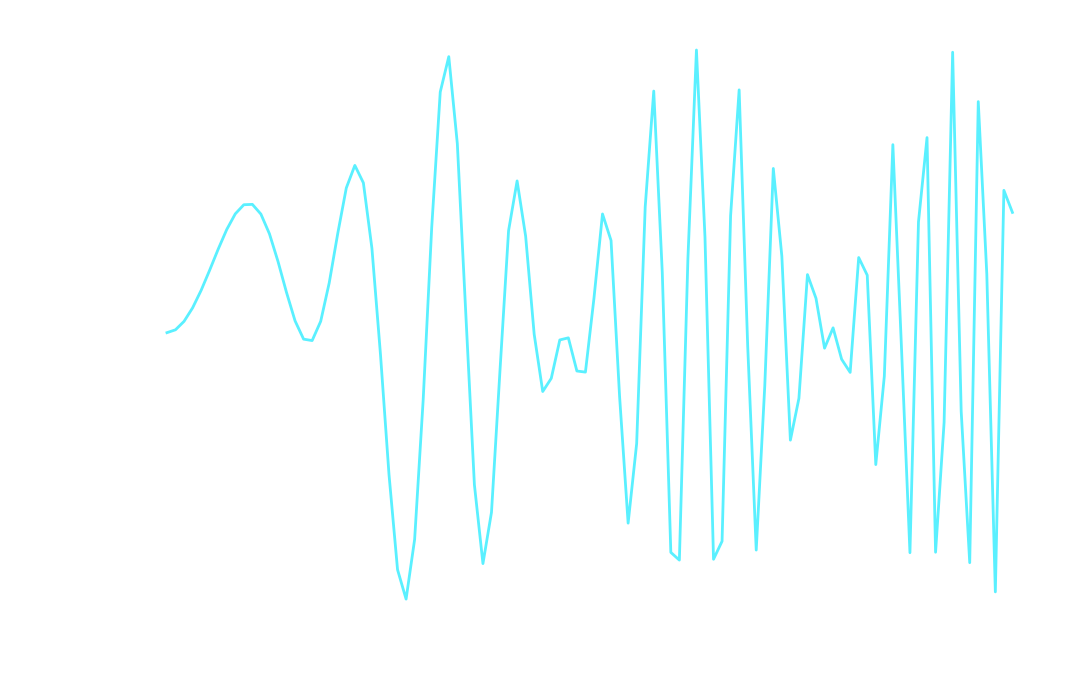

In [21]:
x = np.linspace(0.0, 10.0, 100)
y = np.sin(x*x) * np.cos(x)

def genDataset(*, x, y, fig, fgcolor, prefix, linewidth=1.0, bgcolor='#ffffff'):
    fig.clf()
    canvas = FigureCanvas(fig)
    plt.gca().axis('off')
    #setAxisColor('#0000FF')
    #plt.gca().patch.set_facecolor('red')
    plt.plot(x, y, C=fgcolor, linewidth=linewidth)
    canvas.draw()
    w,h = canvas.get_width_height()
    
    fgImg2d = np.frombuffer(canvas.buffer_rgba(), dtype=np.uint8).reshape(h,w,4)
    fgImg2d = cv2.cvtColor(fgImg2d, cv2.COLOR_RGB2BGR)
    _, mask2d = cv2.threshold(cv2.cvtColor(fgImg2d, cv2.COLOR_BGR2GRAY),254,255,cv2.THRESH_BINARY)
    mask2d = 255-mask2d

    cv2.imwrite(prefix + '-input.png', fgImg2d)
    cv2.imwrite(prefix + '-mask-01.png', mask2d)

def colorFromRGB(r,g,b):
    return '#%02x%02x%02x' % (r,g,b)
    
fig = plt.figure(dpi=200)

Rvalues = list(range(0, 254, 30)) + [255]
Gvalues = list(range(0, 254, 30)) + [255]
Bvalues = list(range(0, 254, 30)) + [255]

allColors = list(itertools.product(Rvalues, Gvalues, Bvalues))
random.seed (42)
trainingColors = random.sample(allColors, 50)

for idx,RGB in enumerate(trainingColors):
    print (RGB)
    genDataset(x=x, y=y, fig=fig, fgcolor=colorFromRGB(*RGB), prefix='img-{:09d}'.format(idx))
